In [1]:
# Step 1 - Pick K random points as cluster centers called centroids
# Step 2 - Assign each Xi to nearest cluster by calculating its distance to each centroid
# Step 3 - Find new cluster centers by taking the average of the assigned points
# Step 4 - Repeat step 2 and step 3 until none of the cluster assignments change

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv("dataset/xclara.csv")

In [4]:
dataset.shape

(3000, 2)

In [5]:
dataset.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [6]:
x1 = dataset['V1'].values
x2 = dataset['V2'].values
X = np.array(list(zip(x1, x2)))

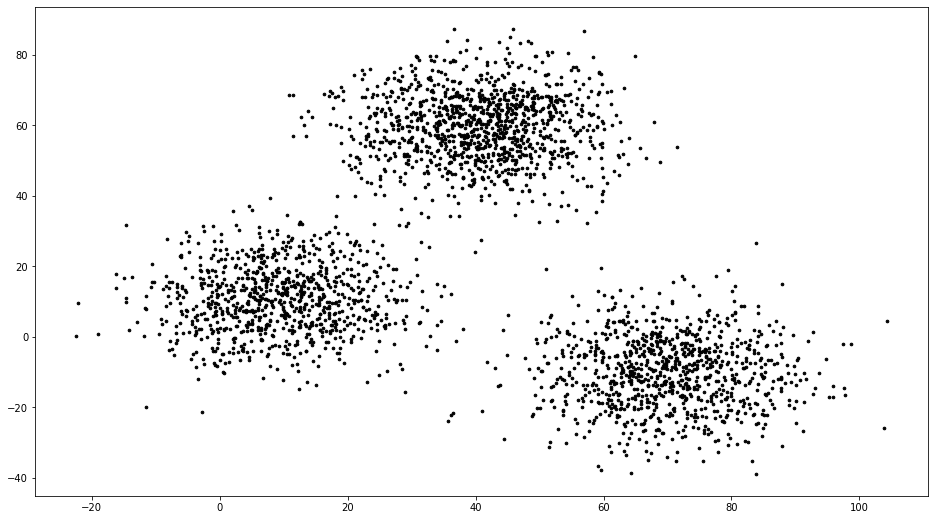

In [7]:
plt.figure(figsize=(16,9))
plt.scatter(x1,x2, c='black', s=7)

In [8]:
# Euclidean distance
def distance(a,b,ax):
    return np.linalg.norm(a - b, axis=ax)

In [23]:
k = 6
# random x coordinates of centroids
centroids_x = np.random.randint( x1.min(), x1.max(), size=k )
# random y coordinates of centroids
centroids_y = np.random.randint( x2.min(), x2.max(), size=k )

In [24]:
centroids_x

array([13, 69, 50, 66, -1, 33])

In [25]:
centroids_y

array([-17, -17,  64, -33,  61,  77])

In [26]:
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [27]:
print(centroids)

[[ 13 -17]
 [ 69 -17]
 [ 50  64]
 [ 66 -33]
 [ -1  61]
 [ 33  77]]


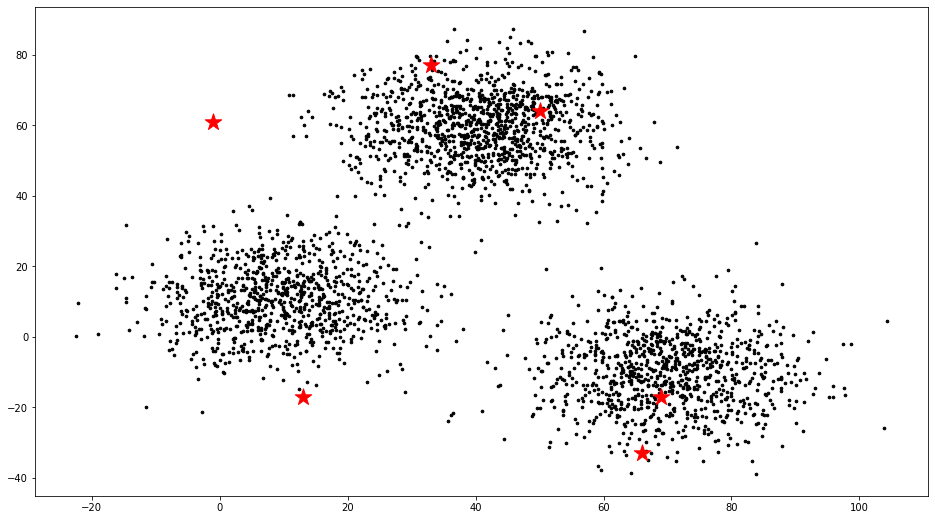

In [28]:
plt.figure(figsize=(16,9))
plt.scatter(x1, x2, c='black', s=7)
plt.scatter(centroids_x, centroids_y, s=300, c='r', marker='*')

In [29]:
C_old = np.zeros(centroids.shape)

In [30]:
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [31]:
# cluster labels - 0,1,2
cluster_labels = np.zeros(len(x1))

In [32]:
cluster_labels

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
def plotData():
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    plt.figure(figsize=(16,9))
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if cluster_labels[j] == i])
        ax.scatter(points[:,0], points[:,1], s=7, c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='#050505')
    plt.show()

In [34]:
error = distance(centroids, C_old, None)

In [35]:
error

168.19334112859522

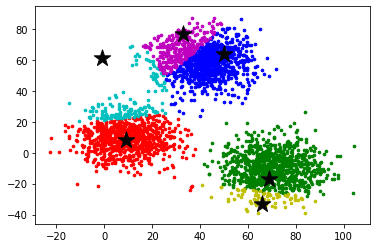

<Figure size 1152x648 with 0 Axes>

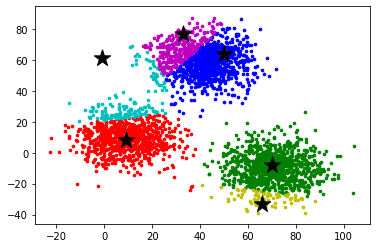

<Figure size 1152x648 with 0 Axes>

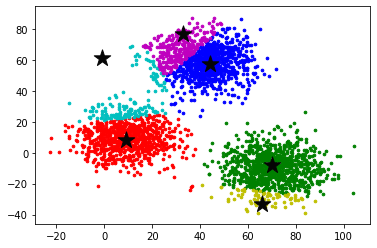

<Figure size 1152x648 with 0 Axes>

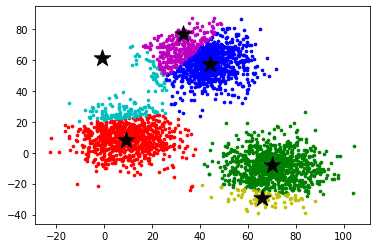

<Figure size 1152x648 with 0 Axes>

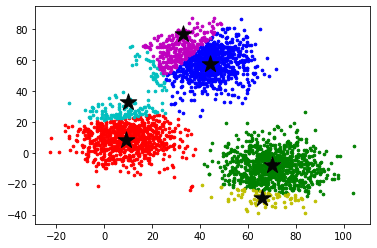

<Figure size 1152x648 with 0 Axes>

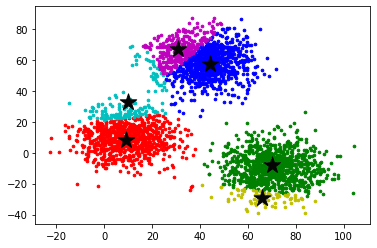

<Figure size 1152x648 with 0 Axes>

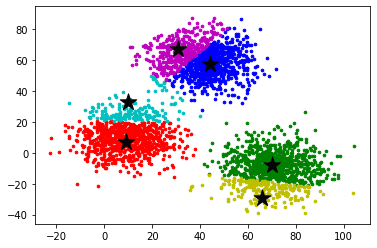

<Figure size 1152x648 with 0 Axes>

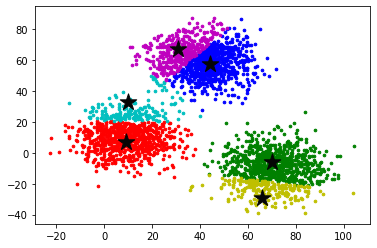

<Figure size 1152x648 with 0 Axes>

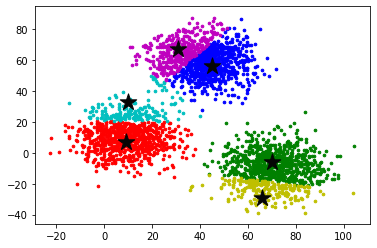

<Figure size 1152x648 with 0 Axes>

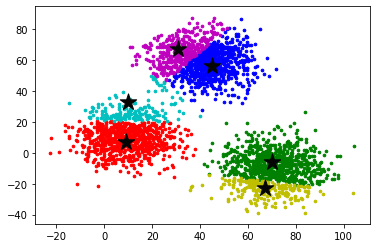

<Figure size 1152x648 with 0 Axes>

In [ ]:
while error != 0:
    # assigning each point to its closest cluster
    for i in range(len(X)):
        distances_list = distance(X[i], centroids, 1)
        cluster_assigned = np.argmin(distances_list)   # 100, 99, 67
        cluster_labels[i] = cluster_assigned
    # storing the old centroids
    C_old = deepcopy(centroids)
    # finding new centroids by taking average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cluster_labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData()
    # distance between new centroids and old centroids
    error = distance(centroids, C_old, None)